In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from imblearn.over_sampling import SMOTE
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import seaborn as sns
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform,randint
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from prettytable import PrettyTable
import pickle


import warnings
warnings.filterwarnings("ignore")

In [3]:
x = pd.read_csv("aps_failure_training_set.csv",na_values=["na"])
print(x.shape)
x.head()

(60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [4]:
print("Total number of Train datapoints: ",x.shape[0])
print("Total number of features: ",x.shape[1])

print("The column/feature names given are:\n ",list(x.columns))

Total number of Train datapoints:  60000
Total number of features:  171
The column/feature names given are:
  ['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'c

In [5]:
#'neg' and 'pos' to 0 and 1 respectively
def get_correct_label(y):
    return y.replace(['neg','pos'],[0,1])


In [6]:
print(x['class'].unique())

['neg' 'pos']


In [7]:
x['class'] = get_correct_label(x['class'])
print(x['class'].unique())

[0 1]


The number of positive class points is:  1000
The number of negative class points is:  59000


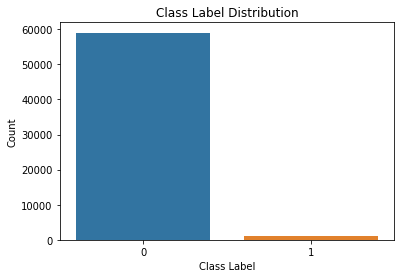

In [8]:
# Plotting the distribution of class label
sns.barplot(x['class'].unique(),x['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('The number of positive class points is: ',x['class'].value_counts()[1])
print('The number of negative class points is: ',x['class'].value_counts()[0])

In [9]:
#get s a list of columns that have std. deviation of 0
def constant_value(df):

    constant_value_feature = []
    info = df.describe()
    for i in df.columns:
        if info[i]['std']==0:
            constant_value_feature.append(i)
    df.drop(constant_value_feature,axis=1,inplace=True)
    return df,constant_value_feature

x , dropped_feature = constant_value(x)
print("The features that are dropped due to having a constant value (0 std. dev.) are: ",dropped_feature)
print("Shape of our feature set: ",x.shape)

The features that are dropped due to having a constant value (0 std. dev.) are:  ['cd_000']
Shape of our feature set:  (60000, 170)


In [10]:

# Creating a dictionary whose keys are the column names and values are the percentage of missing values
nan_count = {k:list(x.isna().sum()*100/x.shape[0])[i] for i,k in enumerate(x.columns)}

# Sorting the dictionary in descending order based on the percentage of missing values
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}

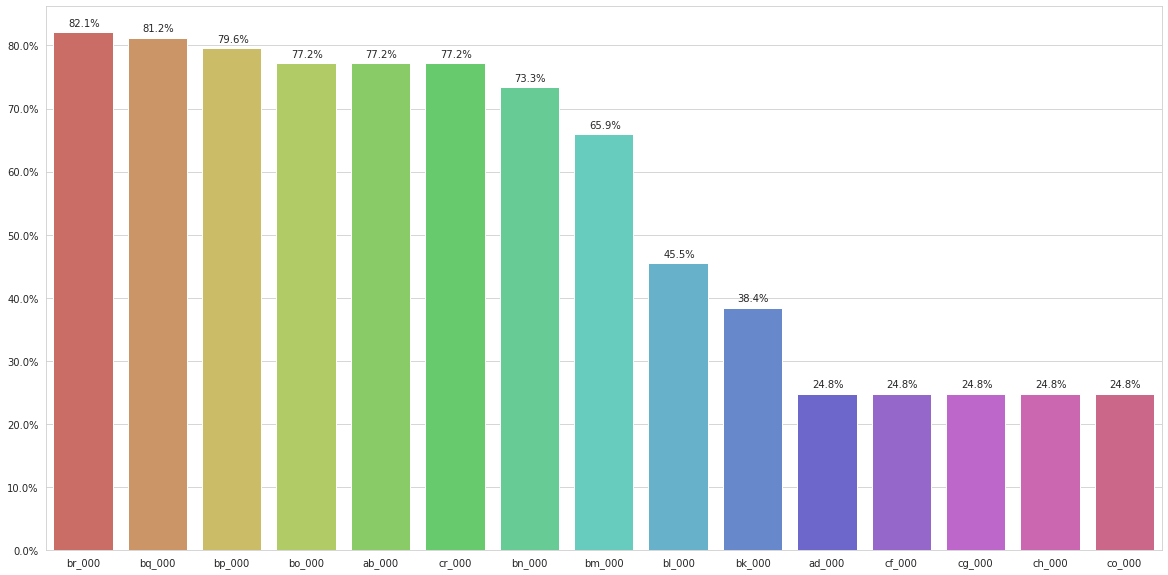

In [11]:
# Plotting a graph showing the top 15 features having highest percentage of missing values 
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))

# Bar Plot
plot = sns.barplot(x= list(nan_count.keys())[:15],y = list(nan_count.values())[:15],palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

In [12]:
#get features having more than 70%  missing data, and removes rows that have NA values
def remove_na(df,nan_feat):
    # Removing  more than 70% NA
    df = df.dropna(axis = 1, thresh=18000)
    # Removing rows having NA from above created list of features
    df = df.dropna(subset=nan_feat)
    # Reset Index values 
    df = df.reset_index(drop=True)
    return df

print("Earlier shape of x:",x.shape)

# List of features having less than 5% NA
na_5 = [k for k,v in nan_count.items() if v < 5]

x = remove_na(x,na_5)
print("Shape after removal of rows and columns:",x.shape)
print("Number of features having missing values below 5%:",len(na_5))

Earlier shape of x: (60000, 170)
Shape after removal of rows and columns: (55973, 163)
Number of features having missing values below 5%: 128


In [13]:
# creating a list of the top 7 features having highest number of missing values
na_70 = list(nan_count.keys())[:7]

# Total removed features
removed_features = na_70 + dropped_feature
print("Removed features are:", removed_features)

Removed features are: ['br_000', 'bq_000', 'bp_000', 'bo_000', 'ab_000', 'cr_000', 'bn_000', 'cd_000']


In [14]:

# Seperating the class label from the other attributes after the NAN rows/columns were deleted
y_train = x['class']
x_train = x.drop('class',axis=1)

In [15]:
#impute missing values with mean, median and mice_imputer
def imputation(df,mis_col):
   
    # Using sklearn's SimpleImputer
    median_imputer = SimpleImputer(missing_values=np.NaN , strategy='median',copy=True)

    # Creating a new dataframe of imputed values
    median_df = median_imputer.fit_transform(df[mis_col])
    df1 = df.copy()
    df1[mis_col] = median_df

    # Performing Model-Based Imputation
    mice_imputer = IterativeImputer(estimator=Ridge(random_state=0),
                                    random_state=0)
    imputed_df = pd.DataFrame(data = mice_imputer.fit_transform(df1) , columns= df1.columns )

    return imputed_df , median_imputer , mice_imputer

# We will impute the missing values in features with their median
median_imputed_features = [k for k,v in nan_count.items() if v >= 5 and v < 15]

imputed_x_train , MEDIAN_imputer , MICE_imputer = imputation( x_train , median_imputed_features )
print("Number of features whose missing values are imputed with median are:\n",len(median_imputed_features))

Number of features whose missing values are imputed with median are:
 14


In [16]:
#find out the train data points and shape
x_test = pd.read_csv("aps_failure_test_set.csv",na_values=["na"])
print(x_test.shape)
print("Total number of Train datapoints: ",x_test.shape[0])
print("Total number of features: ",x_test.shape[1])
x_test.head()

(16000, 171)
Total number of Train datapoints:  16000
Total number of features:  171


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [17]:
#process the data before modeling for imputtions
def preprocess_test_data( x , na_features , median_features , imputer_median , imputer_mice):
    # Replace 'neg' and 'pos' with 0,1 in our dataset
    x['class'] = x['class'].replace(['neg','pos'],[0,1])
    
    # Seperate Class label from the rest of the dataset
    y = x['class']
    x = x.drop('class',axis=1)
    
    # Drop Features with high percentage of missing values
    x = x.drop(na_features , axis=1)
    
    x[median_features] = imputer_median.transform(x[median_features])
    
    x = pd.DataFrame(data = imputer_mice.transform(x) , columns= x.columns )
    
    return x,y



In [18]:
#Pass both test of the data set for above deinfed preproessing task of median and MICE 
x_test , y_test = preprocess_test_data(x_test,
                                       removed_features,
                                       median_imputed_features,
                                       MEDIAN_imputer,
                                       MICE_imputer )
print("Shape of Test data:",x_test.shape)

Shape of Test data: (16000, 162)


In [19]:
#Bins in each identifier
def Identifier_Bin_count(x):
    prefix = []
    # For each feature name, find it's Identifier and count  
    for name in x.columns:
        prefix.append(name.split('_')[0])
    counter = Counter(prefix)
    return list(counter.keys()),list(counter.values())

In [19]:
feature_prefix , bin_count = Identifier_Bin_count(imputed_x_train)

In [20]:
# Getting the Identifier of the histogram features
hist_identifier = [feature_prefix[i] for i,j in enumerate(bin_count) if j==10]
print("The Histogram Identifiers are: ",hist_identifier)

# Getting the names of the features having histograms bin information
hist_features = [i for i in x_train.columns if i.split('_')[0] in hist_identifier]
print("\nThere are",len(hist_features),"features that contain histogram bin information and they are: \n",hist_features)

The Histogram Identifiers are:  ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']

There are 70 features that contain histogram bin information and they are: 
 ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']


In [21]:
histogram_data = imputed_x_train[hist_features]
x_without_hist = imputed_x_train.drop(hist_features,axis=1)

In [22]:
#Feature removing using Random Forest Classifier
def get_top(df,y,n):
    # Use RFE algorithm from sklearn to perform feature selection
    feature_select = RFE(estimator=RandomForestClassifier(n_estimators=150,max_depth=5,random_state=1),
                         n_features_to_select=n,
                         verbose=5)
    feature_select.fit(df,y)

    # support_ gives an array of True/False for each feature where True signifies that the feature is selected
    top_f = [ c for i,c in enumerate(df.columns.tolist()) if feature_select.support_[i] ]   
    return top_f

top_feature_hist = get_top(histogram_data,y_train,15)
print("The top features selected after Recursive Feature Elimination are: \n",top_feature_hist)

Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 fe

In [23]:

# Create a dataframe which is a subset of our original dataset and consists of only the top features and the class label
top_features = pd.DataFrame(data=x_train[top_feature_hist],columns=top_feature_hist)
top_features['class'] = y_train
top_features.head()

,ag_001,ag_002,ag_003,ay_005,ay_006,ay_008,ba_002,ba_003,ba_004,cn_000,cn_004,cs_002,cs_004,ee_003,ee_005,class
0,0.0,0.0,0.0,469014.0,4239660.0,755876.0,415432.0,287230.0,310246.0,0.0,1309472.0,267998.0,428776.0,493384.0,469792.0,0
1,0.0,0.0,0.0,71510.0,772720.0,99560.0,199512.0,154298.0,137280.0,0.0,1179502.0,164860.0,272956.0,178064.0,245416.0,0
2,0.0,0.0,0.0,0.0,870456.0,1450312.0,332340.0,254892.0,189596.0,0.0,1215280.0,56362.0,100326.0,159812.0,409564.0,0
3,0.0,0.0,318.0,0.0,0.0,5596.0,304.0,102.0,74.0,0.0,2170.0,24.0,692.0,46.0,44.0,0
4,0.0,0.0,0.0,372236.0,2128914.0,584074.0,338762.0,236540.0,182278.0,0.0,2497104.0,80950.0,186242.0,229790.0,347188.0,0


Feature 'ag_001' , Class Label 1, Mean: 42503.54
Standard Deviation 232360.91 

Feature 'ag_001' , Class Label 0, Mean: 114.5
And Standard Deviation is 5281.05 
****************************************************************************************************
Feature 'ag_002' , Class Label 1, Mean: 320375.83
Standard Deviation 822733.38 

Feature 'ag_002' , Class Label 0, Mean: 1203.01
And Standard Deviation is 32764.93 
****************************************************************************************************
Feature 'ag_003' , Class Label 1, Mean: 2038674.17
Standard Deviation 3278082.14 

Feature 'ag_003' , Class Label 0, Mean: 29728.63
And Standard Deviation is 351415.59 
****************************************************************************************************
Feature 'ay_005' , Class Label 1, Mean: 1034242.09
Standard Deviation 4858700.79 

Feature 'ay_005' , Class Label 0, Mean: 54497.11
And Standard Deviation is 535247.53 
*********************************

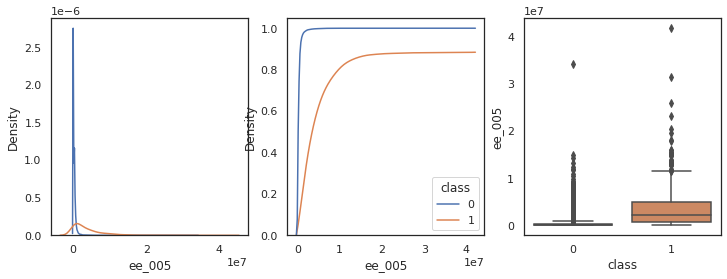

In [24]:
#plot probability Density Function & Cumulative Density Function 
def plots(x):
    for n in x.columns.tolist():
        if n != 'class':

            describe_0 = x[x['class']==0].describe()
            describe_1 = x[x['class']==1].describe()

            fig,ax = plt.subplots(1,3,figsize=(12,4))
            
            print( '\033[1m' + "Feature '{}' , Class Label 1, Mean: {}".format(n , round(describe_1[n].iloc[1],2) ) )
            print( "Standard Deviation {} ".format( round(describe_1[n].iloc[2],2) ) )
            print( "\nFeature '{}' , Class Label 0, Mean: {}".format(n , round(describe_0[n].iloc[1],2) ) )
            print( "And Standard Deviation is {} ".format( round(describe_0[n].iloc[2],2) ) )
            
            sns.set_theme(style='white')
            # Plot PDF of points belonging to negative class
            sns.distplot(x[x['class']==0][n],ax=ax[0],hist=False)
            # Plot PDF of points belonging to positive class 
            sns.distplot(x[x['class']==1][n],ax=ax[0],hist=False)
            # Plot CDF of the feature values
            sns.kdeplot(data=x, x=x[n], hue="class",cumulative=True, common_norm=False, common_grid=True,ax=ax[1])
            # Plot the Box-Plot
            sns.boxplot(x=x['class'],y=x[n],ax=ax[2])
            plt.show()
            print('*'*100)

plots(top_features)

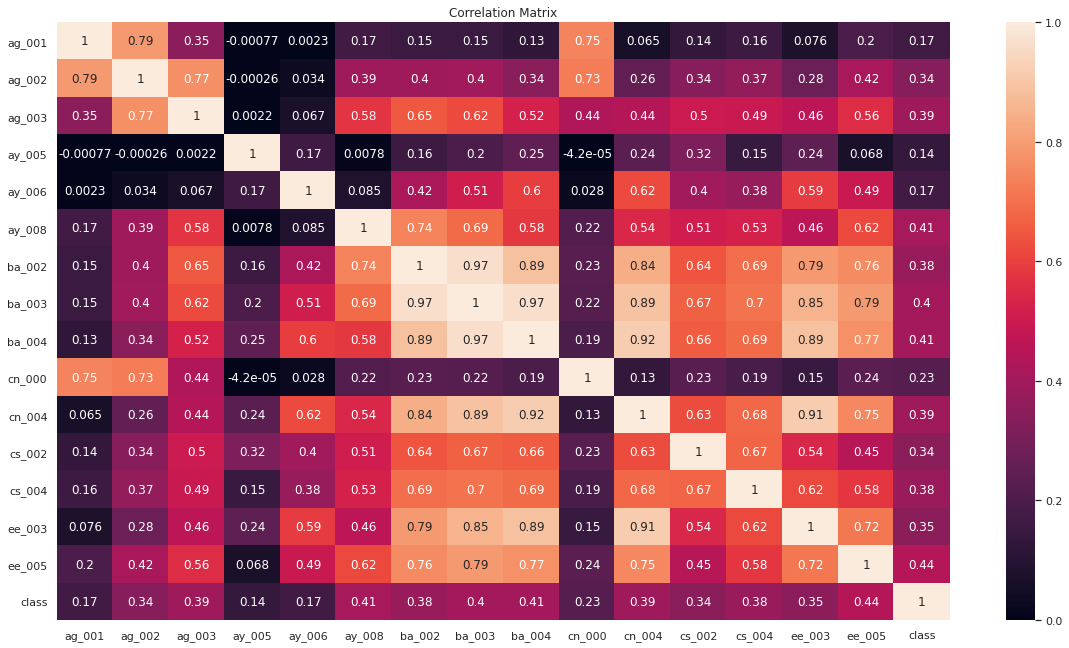

In [25]:

# Plot Correlation Heatmap      
plt.figure(figsize=(20,11))
sns.heatmap(top_features.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

In [26]:
# Getting correlation coeffiecients of features w.r.t class
correlation_values = top_features.corr().loc['class']

# Get top 5 features
top_correlated_features = correlation_values.sort_values().iloc[:5].index.tolist()
print("Most Uncorrelated Feature is",top_correlated_features[0])

Most Uncorrelated Feature is ay_005


In [28]:

# Calling the function created earlier to select top features
top_feature_num = get_top(x_without_hist , y_train , 15)
print("The top features selected after Recursive Feature Elimination are: \n",top_feature_num)

Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 fe

In [32]:
# Getting correlation coeffiecients of features w.r.t class
correlation_values = top_features.corr().loc['class']

# Get top 5 features
top_correlated_features = correlation_values.sort_values().iloc[:5].index.tolist()
print("Most Uncorrelated Feature is",top_correlated_features[0])

Most Uncorrelated Feature is dx_000


In [34]:
#use MinMax scaler to transforms features 
def scale_data(df):
    min_max = MinMaxScaler()
    df = pd.DataFrame( data = min_max.fit_transform(df) , columns = df.columns )
    return df , min_max

In [35]:
#balance unmbalanced dataset
def balance_data(df,label):
    over = SMOTE(sampling_strategy=0.3)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    df, label = pipeline.fit_resample(df, label)
    return df, label


In [36]:
#both negative and positive balanced data set post balancing
X_train, Y_train = balance_data(imputed_x_train , y_train)
print(X_train.shape)
print(Y_train.value_counts())

(49839, 162)
0    33226
1    16613
Name: class, dtype: int64


In [37]:
#Transform using scalor the test data
X_train_scale,scaler = scale_data(X_train)
X_test_scale = pd.DataFrame(data = scaler.transform(x_test) , columns=x_test.columns)
print(X_train_scale.shape,X_test_scale.shape)

(49839, 162) (16000, 162)


In [38]:
#defining hyper paramter tuning function
def tuning( x , y , model , params , cv=10 ,verbose=10 ):
    # Define the model that performs Hyperparameter tuning
    clf = GridSearchCV(estimator= model,
                       param_grid= params,
                       scoring= 'f1_macro',
                       cv= cv,                         
                       verbose= verbose,
                       n_jobs= -1)
    
    # Fit the model to the dataset
    clf.fit( x , y )
    return clf.best_params_ , clf.best_score_

In [39]:
#create confusion matrix using the tuned parameters
def plot_confusion( y_test , y_hat ):
 
    # Show Confusion Matrix Heatmap
    cf_matrix_test = confusion_matrix(y_test , y_hat)
        
    group_names = ["TN","FP","FN","TP"]
    group_counts = ["{}".format(value) for value in cf_matrix_test.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [40]:
#get tje results for each model prediction
def model_results_pred( model , x_train , x_test , y_train , y_test ):
    # Predic class labels
    y_train_hat = model.predict(x_train)
    y_test_hat = model.predict(x_test) 
    
    f1_macro = f1_score(y_test, y_test_hat,average='macro')
    
    print('\033[1m'+'Macro-F1 Score: ',f1_macro)
    
    # Plot Test Confusion Matrix
    print("\tTest Confusion Matrix")
    plot_confusion(y_test,y_test_hat)
    
    return f1_macro

Macro-F1 Score:  0.49407114624505927
	Test Confusion Matrix


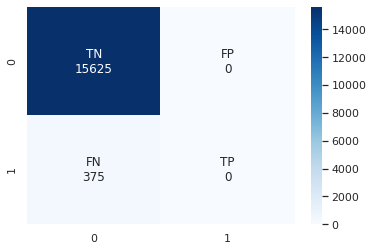

In [41]:
dummy_model = DummyClassifier(strategy='constant',constant=0)
dummy_model.fit(X_train,Y_train)

F1_Base = model_results_pred( dummy_model , X_train , x_test , Y_train , y_test )

In [42]:
# Defining the different parameters for tuning
params = {'C': np.random.uniform(0.001,1,5), 'tol':np.random.uniform(0.0001,0.1,5) }

# Obtain best hyperparameters
best_params_log , best_score_log = tuning(X_train_scale,
                                          Y_train,
                                          LogisticRegression(n_jobs=-1,random_state=42),
                                          params,
                                          cv=10,
                                          verbose=2)


print(" Best Parameters:",best_params_log,"with score of:",best_score_log)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
 Best Parameters: {'C': 0.8276298878168667, 'tol': 0.08347429423078671} with score of: 0.9471054105401702


Macro-F1 Score:  0.8086883927302069
	Test Confusion Matrix


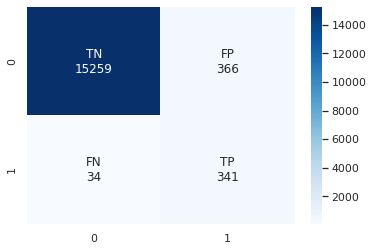

In [43]:
#passing the LR with C vaulues from params define above
LR_model = LogisticRegression(C= best_params_log['C'],
                              tol= best_params_log['tol'],
                              n_jobs=-1, 
                              random_state=42)

LR_model.fit(X_train_scale,Y_train)

F1_LR = model_results_pred( LR_model , X_train_scale , X_test_scale , Y_train , y_test)

In [44]:
# Defining the different parameters for tuning
params = {'penalty': ['l1','l2'], 'alpha':np.random.uniform(0.0001,0.1,9) }

# Obtain best hyperparameters
best_params_sgd , best_score_sgd = tuning(X_train_scale,
                                          Y_train,
                                          SGDClassifier(n_jobs=-1,random_state=0),
                                          params,
                                          cv=10,
                                          verbose=1)

print(" Best Parameters:",best_params_sgd,"with score of:",best_score_sgd)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
 Best Parameters: {'alpha': 0.0039149613523597245, 'penalty': 'l2'} with score of: 0.9305835895354072


Macro-F1 Score:  0.7608339553600219
	Test Confusion Matrix


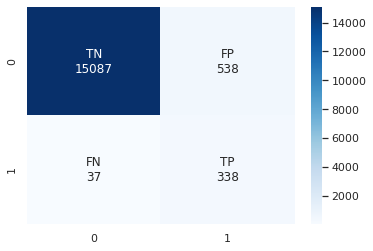

In [45]:
#passing the SGD Classifer with C vaulues from params define above
SVM_model = SGDClassifier(penalty= best_params_sgd['penalty'],
                          alpha= best_params_sgd['alpha'],
                          n_jobs= -1,
                          random_state= 0)

SVM_model.fit(X_train_scale,Y_train)

F1_SVM = model_results_pred( SVM_model , X_train_scale , X_test_scale , Y_train , y_test )

In [48]:
# Defining the different parameters for tuning
params = {'max_depth': np.random.randint(10,25,5)}

# Obtain best hyperparameters
best_params_dt , best_score_dt = tuning(X_train,
                                        Y_train,
                                        DecisionTreeClassifier(),
                                        params,
                                        cv=11)


print(" Best Parameters:",best_params_dt,"with score of:",best_score_dt)

Fitting 11 folds for each of 5 candidates, totalling 55 fits
 Best Parameters: {'max_depth': 24} with score of: 0.9869958200679855


Macro-F1 Score:  0.7895837010427373
	Test Confusion Matrix


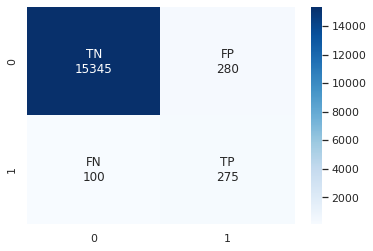

In [49]:
#passing the DTC with C vaulues from params define above
DT_model = DecisionTreeClassifier(max_depth = best_params_dt['max_depth'])

# Fit and predict, and obtain train and test scores
DT_model.fit(X_train,Y_train)

F1_DT = model_results_pred( DT_model ,  X_train , x_test , Y_train , y_test)

In [51]:
#idenfiying the hyper params
params = {'n_estimators':[ 400 , 600 , 650 , 700 , 750 , 800 ]}


# Obtain best hyperparameters
best_params_ab , best_score_ab = tuning(X_train,
                                          Y_train,
                                        AdaBoostClassifier(random_state=42),
                                        params,
                                        cv=4)


print(" Best Parameters:",best_params_ab,"with score of:",best_score_ab)

Fitting 4 folds for each of 6 candidates, totalling 24 fits
 Best Parameters: {'n_estimators': 800} with score of: 0.9940644357326008


Macro-F1 Score:  0.8420229871104269
	Test Confusion Matrix


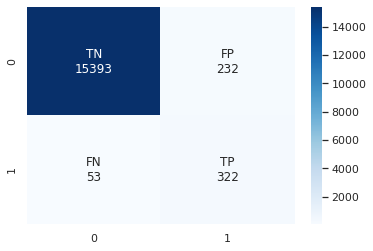

In [52]:

# #passing the AdaBoost with C vaulues from params define above
AB_model = AdaBoostClassifier(random_state=42,
                              n_estimators = best_params_ab['n_estimators']) 


# Fit and predict, and obtain train and test scores
AB_model.fit(X_train , Y_train)
# Fit and predict, and obtain train and test scores
F1_AB = model_results_pred(AB_model , X_train , x_test , Y_train , y_test)